# 1. Импортируем библиотеки и датасет 

In [1]:
import pandas as pd
import random
import numpy as np
import re
import nltk
import nltk.corpus
import string
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/elizabethsolomyannik/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/elizabethsolomyannik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
tsv_file = 'reviews.tsv'
df_all = pd.read_table(tsv_file, sep='\t')
df = df_all.sample(n = 10000)
df.to_csv('new_name.csv', index=False, encoding="utf8")

In [3]:
df.head()

,permalink,rating,review_text
81807,1625818894,4.0,"Обычная столовая, есть неплохой выбор. Но цены..."
131861,25188907280,4.0,Норм кофе
58153,1265503173,5.0,"Очень вкусный кофе,приветливые сотрудники."
304963,217218930963,4.0,"Хорошее , уютное место. Кухня вкусная .\nИз ми..."
218220,119614877961,5.0,Очень приятный персонал.


# 2 Обработка текста

## 2.1 Чистим датасет от пропущенных значений в поле rating и от rating = 0.0

In [4]:
len(df) #кол-во строк в датасете

10000

In [5]:
df = df.loc[df['rating'] != 0.0] #оставляем строки со значением 'rating' не 0.0

In [6]:
df.head()

,permalink,rating,review_text
81807,1625818894,4.0,"Обычная столовая, есть неплохой выбор. Но цены..."
131861,25188907280,4.0,Норм кофе
58153,1265503173,5.0,"Очень вкусный кофе,приветливые сотрудники."
304963,217218930963,4.0,"Хорошее , уютное место. Кухня вкусная .\nИз ми..."
218220,119614877961,5.0,Очень приятный персонал.


In [7]:
len(df) #кол-во строк в датасете без 0.0 

9998

In [8]:
df = df.dropna() #удаляем строки, в которых есть пропущенные значения столбцов

In [9]:
len(df)

9993

In [10]:
df.head()

,permalink,rating,review_text
81807,1625818894,4.0,"Обычная столовая, есть неплохой выбор. Но цены..."
131861,25188907280,4.0,Норм кофе
58153,1265503173,5.0,"Очень вкусный кофе,приветливые сотрудники."
304963,217218930963,4.0,"Хорошее , уютное место. Кухня вкусная .\nИз ми..."
218220,119614877961,5.0,Очень приятный персонал.


## 2.2 Очистка текста от html тэгов и знаков препинания

In [11]:
df['review_text'] = df['review_text'].astype(str) #переводим столбец в строку

In [12]:
df['review_text'] = df['review_text'].str.replace(r'\W', " ") #удаляем html тэги и пунктуацию c помощью регулярного выражения

In [13]:
df.head(50)

,permalink,rating,review_text
81807,1625818894,4.0,Обычная столовая есть неплохой выбор Но цены...
131861,25188907280,4.0,Норм кофе
58153,1265503173,5.0,Очень вкусный кофе приветливые сотрудники
304963,217218930963,4.0,Хорошее уютное место Кухня вкусная nИз ми...
218220,119614877961,5.0,Очень приятный персонал
3372,1009805320,4.0,Очень вкусная грузинская кухня Атмосферный ин...
255958,161421077652,5.0,Вкусно быстро
305551,217739990215,5.0,Приятное и уютное место всегда много народу в...
100717,1776981793,5.0,Лучшая пицца в Красногорске Сделана с любовь...
226849,129488288116,5.0,Все на уровне Персонал френдли Придем ещё


## 2.3 Токенизация

In [14]:
from nltk.tokenize import word_tokenize

In [15]:
df['review_text'] = df['review_text'].apply(word_tokenize)

In [16]:
df.head()

,permalink,rating,review_text
81807,1625818894,4.0,"[Обычная, столовая, есть, неплохой, выбор, Но,..."
131861,25188907280,4.0,"[Норм, кофе]"
58153,1265503173,5.0,"[Очень, вкусный, кофе, приветливые, сотрудники]"
304963,217218930963,4.0,"[Хорошее, уютное, место, Кухня, вкусная, nИз, ..."
218220,119614877961,5.0,"[Очень, приятный, персонал]"


## 2.4 Лемматизация и удаление стоп-слов

In [17]:
import pymystem3
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/elizabethsolomyannik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
from nltk.corpus import stopwords
print(stopwords.words('russian'))

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [19]:
from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation

mystem = Mystem() 
russian_stopwords = stopwords.words("russian")

def preprocess_text(text):
    tokens = []              #создаем пустой массив токенов
    for token in text:
        tokens.append(mystem.lemmatize(token.lower())[0])   
        tokens = [token for token in tokens if token not in russian_stopwords
              and token != " "\
              and token.strip() not in punctuation] 
        
    text = " ".join(tokens) #....................
    
    return text

In [20]:
for index, row in df.iterrows():
    df.loc[index, 'review_text'] = preprocess_text(row['review_text'])
    #row['review_text'] = preprocess_text(row['review_text'])

In [21]:
df.head()

,permalink,rating,review_text
81807,1625818894,4.0,обычный столовая неплохой выбор цена маленький...
131861,25188907280,4.0,норма кофе
58153,1265503173,5.0,очень вкусный кофе приветливый сотрудник
304963,217218930963,4.0,хороший уютный место кухня вкусный пиза минус ...
218220,119614877961,5.0,очень приятный персонал


# 3 Сентимент

In [22]:
def sentiment(n): # используем значение rating как маркер для сентимента

    return 1 if n >= 4 else 0

In [23]:
df['sentiment'] = df['rating'].apply(sentiment) # добавляем колонку сентимент (1: rating >=4, 0: rating <=3)

In [24]:
df.head()

,permalink,rating,review_text,sentiment
81807,1625818894,4.0,обычный столовая неплохой выбор цена маленький...,1
131861,25188907280,4.0,норма кофе,1
58153,1265503173,5.0,очень вкусный кофе приветливый сотрудник,1
304963,217218930963,4.0,хороший уютный место кухня вкусный пиза минус ...,1
218220,119614877961,5.0,очень приятный персонал,1


## 3.1 Деление датасета на тестовую и обучающую выборки

In [25]:
X = df['review_text']

y = df['sentiment']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## 3.2 Векторизация

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer() # вектор тестовой и обучающей выборки, матрица слов

X_train_vect = cv.fit_transform(X_train)

X_test_vect = cv.transform(X_test) 

## 3.3 Логистическая регрессия

In [28]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

model = LogisticRegression()

model.fit(X_train_vect, y_train)

y_pred_class = model.predict(X_test_vect)

In [31]:
accuracy_score(y_test, y_pred_class)

0.8971588635454182

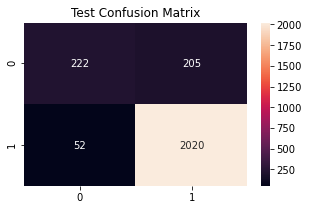

In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix') 
plt.show()

### По графику: из 427 негативных отзывов 222 модель верно классифицировала как негативные и 205 неверно как позитивные; из 2072 позитивных 52 классифицировались как негативные и 2020 как позитивные

## 3.4 Баесовский классификатор

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf = MultinomialNB()
clf.fit(X_train_vect, y_train)

y_pred = clf.predict(X_test_vect) 
print('Test Accuracy: ', accuracy_score(y_test, y_pred)) 

Test Accuracy:  0.8967587034813925


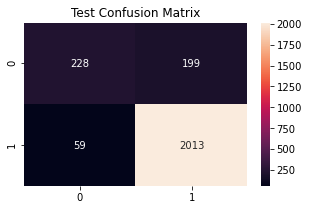

In [33]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

### По графику: из 427 негативных отзывов 228 модель верно классифицировала как негативные и 199 неверно как позитивные; из 2072 позитивных 59 классифицировались как негативные и 2013 как позитивные